# Pandas数据处理
* 了解共享单车数据
* 现在你就是一位共享单车运营方的数据分析师
* 构建神经网络
* 使用已有数据对未来数据进行预测
* 测试你的结果
* 数据下载地址：https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

![bike](pic/bike.png)

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1、读取数据
* 使用pandas可以读取各种数据

In [15]:
# 路径记得自行修改
data_path ='data/hour.csv'
rides = pd.read_csv(data_path)
rides.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## 2、数据处理
* pandas可以进行索引
* 并可以直接 plot

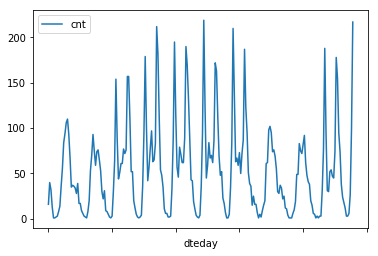

In [16]:
rides[:24*10].plot(x='dteday', y='cnt')

### 数据整形
* 数据中有许多不适合运算的部分, 例如season，可以对其进行 onehot 处理
* pandas 的 get_dummies() 方法可以进行 onehot 处理
* pandas 的 concat() 方法可以对数据进行嫁接
* 处理完后不要忘记使用 drop() 方法将原始列丢弃掉

In [17]:
# onehot 处理
onehot_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for each in onehot_fields:
    onehot = pd.get_dummies(rides[each], prefix=each, drop_first=False)
    rides = pd.concat([rides, onehot], axis=1)

# 丢弃原始列以及不使用的列
drop_fields = ['instant', 'dteday', 'season', 'weathersit', 'weekday', 'atemp', 'mnth', 'workingday', 'hr']
data = rides.drop(drop_fields, axis=1)
data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,8,32,40,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,5,27,32,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,3,10,13,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


### 数值规范化
* 有时需要把数据规范在0~1之间
* 有时需要把数据规范在接近于0的正负区间内
* 一种常用的规范化算法就是将每个数据减去平均值后再除以标准差
* pandas 可以直接通过列名进行索引

In [18]:
need_norm = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']
save_norm = {}
for one in need_norm:
    mean, std = data[one].mean(), data[one].std()
    save_norm[one] = [mean, std]
    data.loc[:, one] = (data[one] - mean)/std
    
data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,-1.334609,0.947345,-1.553844,-0.662736,-0.930162,-0.956312,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,-1.438475,0.895513,-1.553844,-0.561326,-0.804632,-0.823998,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,-1.438475,0.895513,-1.553844,-0.622172,-0.837666,-0.868103,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,-1.334609,0.636351,-1.553844,-0.662736,-0.949983,-0.972851,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,-1.334609,0.636351,-1.553844,-0.723582,-1.009445,-1.039008,1,0,...,0,0,0,0,0,0,0,0,0,1
